<a href="https://colab.research.google.com/github/Ravurumadhuri/MatplotLib/blob/main/MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Step 1: Understand the Data

In [6]:
# shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 614, Columns: 13


In [7]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# quick stats for numeric and object columns
print(df.describe(include='all'))

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP002990   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique 

#Step 2: Handle Missing Values

In [9]:
#count of missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


In [10]:
# fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# fill numerical columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

#Step 3: Fix Data Types

In [11]:
# example: convert 'LoanAmount' to float
df['LoanAmount'] = df['LoanAmount'].astype(float)

# convert categorical variables to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

#Step 4: Standardize Text Columns

In [12]:
# strip whitespace and convert to consistent case
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

#Step 5: Handle Outliers

In [13]:
# capping outliers at 99th percentile
for col in ['LoanAmount', 'ApplicantIncome']:
    upper = df[col].quantile(0.99)
    df[col] = df[col].apply(lambda x: upper if x > upper else x)

In [14]:
df.to_csv('cleaned_loan_data.csv', index=False)

#Final Pipeline Function

In [15]:
def clean_loan_data(df):
    # fill missing values
    for col in df.select_dtypes(include='object'):
        df[col].fillna(df[col].mode()[0], inplace=True)
    for col in df.select_dtypes(include=['int64', 'float64']):
        df[col].fillna(df[col].median(), inplace=True)

    # type conversions
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].str.strip().str.lower()

    # outlier capping
    for col in ['LoanAmount', 'ApplicantIncome']:
        if col in df.columns:
            upper = df[col].quantile(0.99)
            df[col] = df[col].apply(lambda x: upper if x > upper else x)

    return df

#MatPlotLib

In [19]:
df = pd.read_csv('/content/cleaned_loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,lp001002,male,no,0,graduate,no,5849.0,0.0,128.0,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583.0,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000.0,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583.0,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000.0,0.0,141.0,360.0,1.0,urban,y


In [20]:
import matplotlib.pyplot as plt

#Line-Plot

In [25]:
edu_loan = df.groupby('Education')['LoanAmount'].sum().sort_index()
print(edu_loan.head())


Education
graduate        72913.09
not graduate    15934.00
Name: LoanAmount, dtype: float64


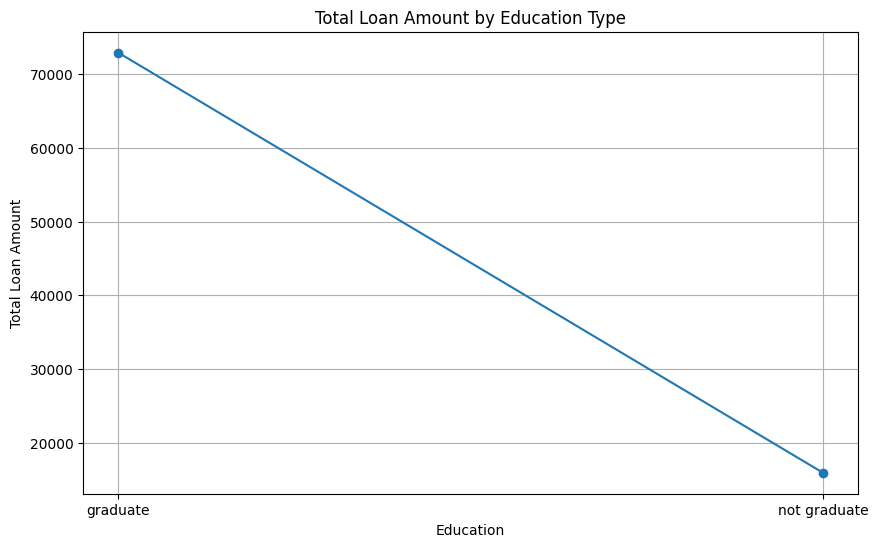

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(edu_loan.index, edu_loan.values, marker='o')
plt.title('Total Loan Amount by Education Type')
plt.xlabel('Education')
plt.ylabel('Total Loan Amount')
plt.grid(True)
plt.show()

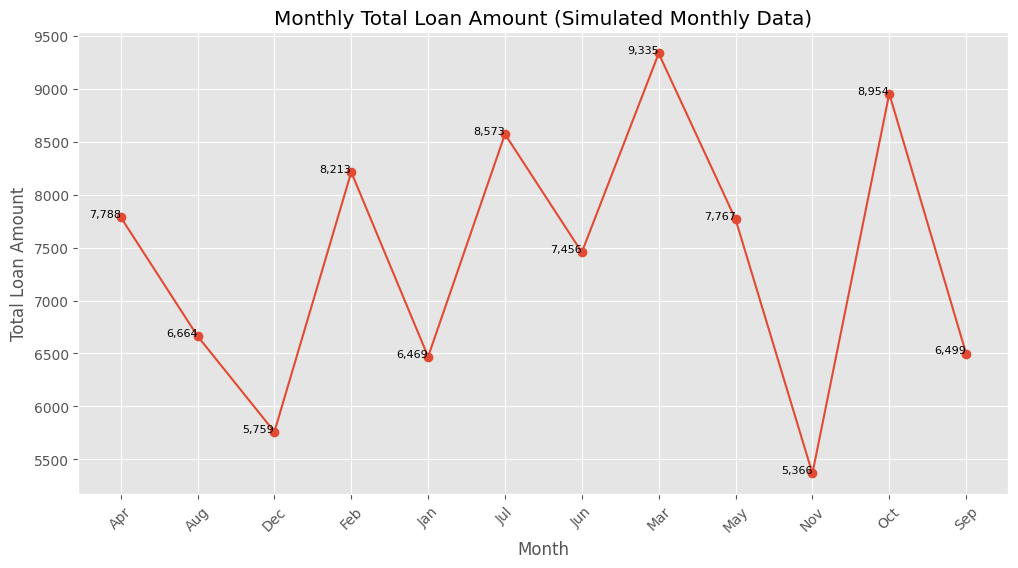

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_loan_data.csv")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = np.random.choice(months, size=len(df))
monthly_revenue = df.groupby('Month')['LoanAmount'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Total Loan Amount (Simulated Monthly Data)')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', color='black', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.grid(True)
plt.show()


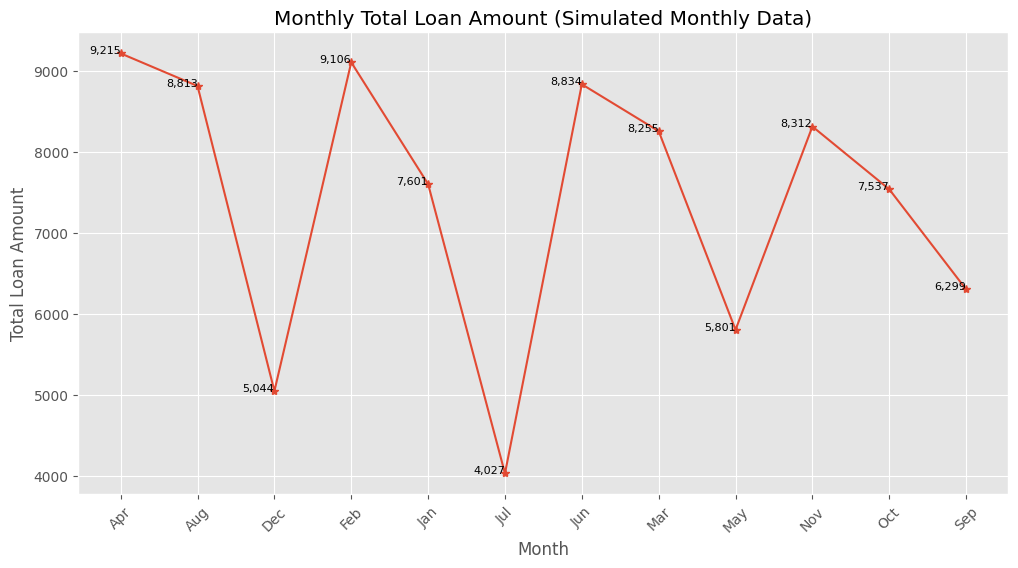

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_loan_data.csv")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = np.random.choice(months, size=len(df))
monthly_revenue = df.groupby('Month')['LoanAmount'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='*')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Total Loan Amount (Simulated Monthly Data)')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', color='black', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.grid(True)
plt.show()

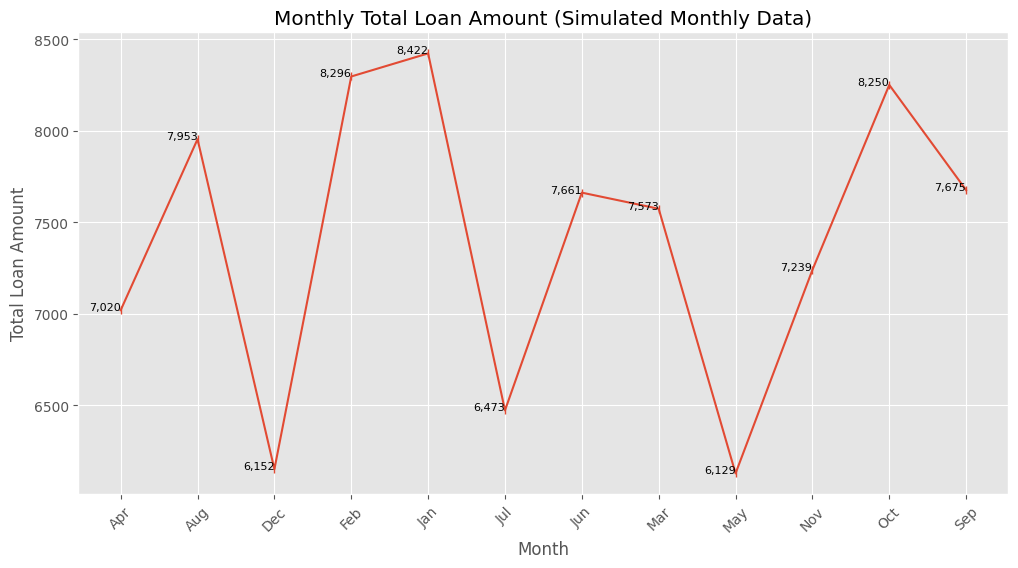

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_loan_data.csv")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = np.random.choice(months, size=len(df))
monthly_revenue = df.groupby('Month')['LoanAmount'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='|')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Total Loan Amount (Simulated Monthly Data)')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', color='black', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.grid(True)
plt.show()

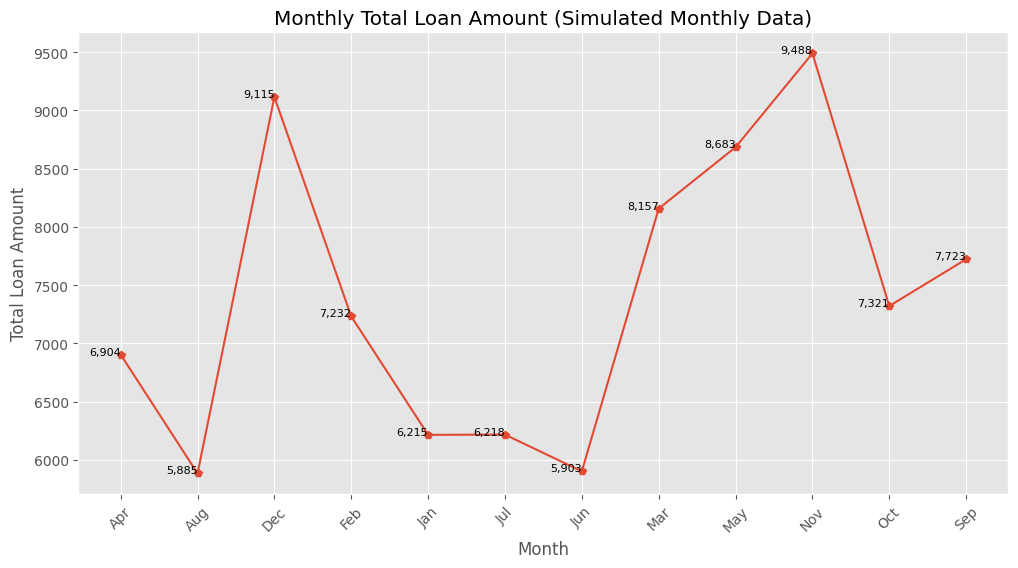

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_loan_data.csv")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = np.random.choice(months, size=len(df))
monthly_revenue = df.groupby('Month')['LoanAmount'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='p')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Total Loan Amount (Simulated Monthly Data)')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', color='black', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.grid(True)
plt.show()

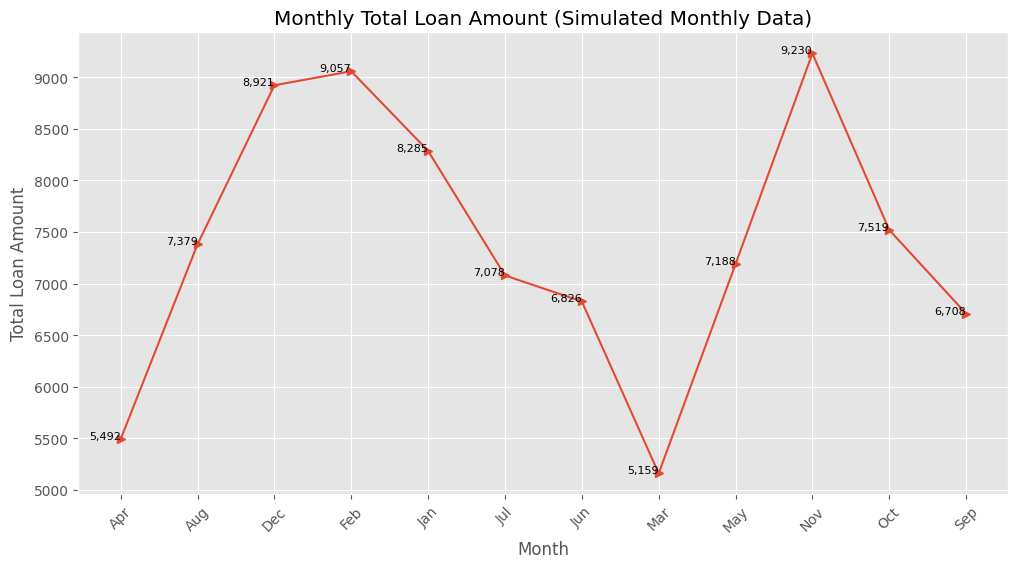

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_loan_data.csv")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = np.random.choice(months, size=len(df))
monthly_revenue = df.groupby('Month')['LoanAmount'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='>')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Total Loan Amount (Simulated Monthly Data)')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', color='black', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.grid(True)
plt.show()

#Histogram

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  lp001002   male      no          0      graduate            no   
1  lp001003   male     yes          1      graduate            no   
2  lp001005   male     yes          0      graduate           yes   
3  lp001006   male     yes          0  not graduate            no   
4  lp001008   male      no          0      graduate            no   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       128.0             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         urban           y  
1             1.0         rural           n  
2             1.0   

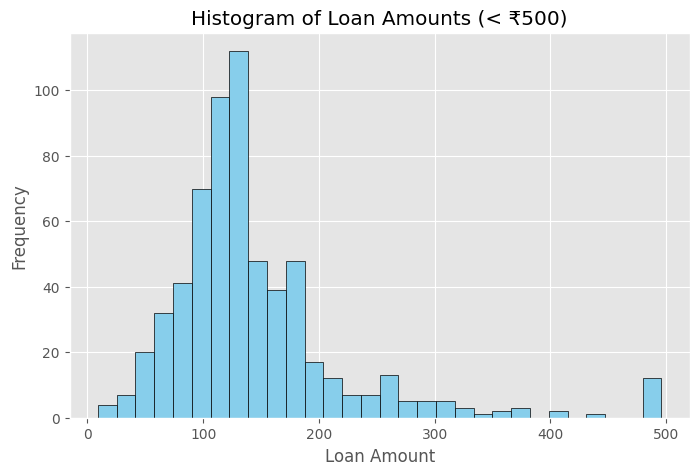

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("cleaned_loan_data.csv")

df_loan = df[df['LoanAmount'] < 500]   # filter smaller loan amounts
print(df_loan.head())

plt.figure(figsize=(8, 5))
plt.hist(df_loan['LoanAmount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Loan Amounts (< ₹500)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#BarPlot

By Education

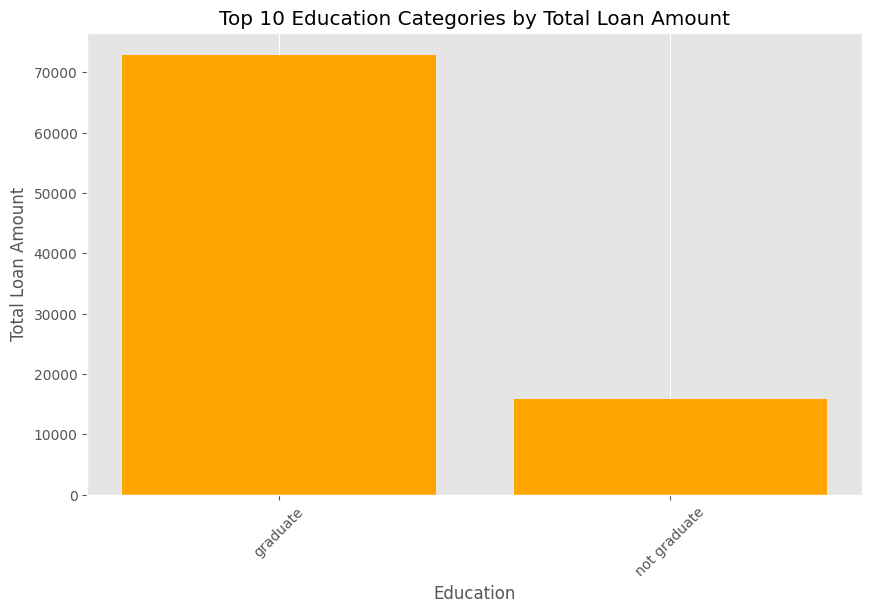

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("cleaned_loan_data.csv")

edu_loan = df.groupby('Education')['LoanAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(edu_loan.index, edu_loan.values, color='orange')
plt.title("Top 10 Education Categories by Total Loan Amount")
plt.xlabel("Education")
plt.ylabel("Total Loan Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


By Gender

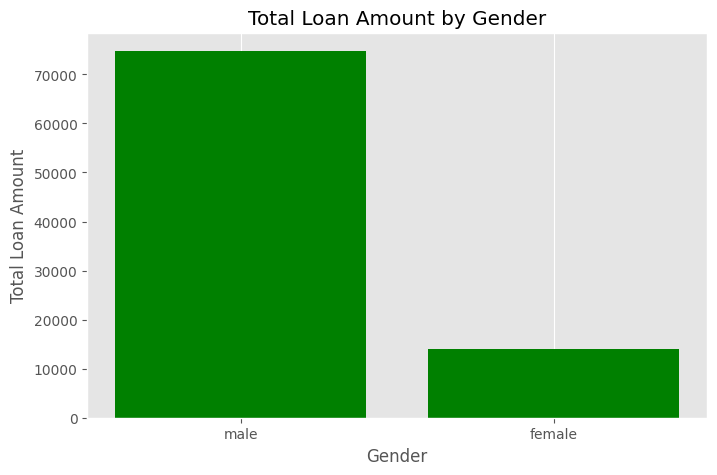

In [30]:
gender_loan = df.groupby('Gender')['LoanAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(gender_loan.index, gender_loan.values, color='green')
plt.title("Total Loan Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Loan Amount")
plt.grid(axis='y')
plt.show()


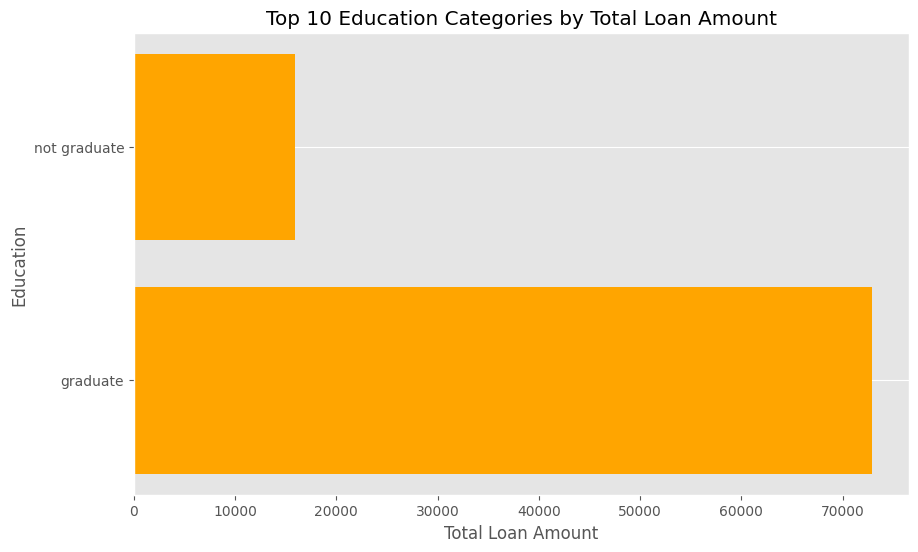

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("cleaned_loan_data.csv")

edu_loan = df.groupby('Education')['LoanAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(edu_loan.index, edu_loan.values, color='orange')
plt.title("Top 10 Education Categories by Total Loan Amount")
plt.xlabel("Total Loan Amount")
plt.ylabel("Education")
plt.grid(axis='x')
plt.show()

#Pie Chart

By Gender

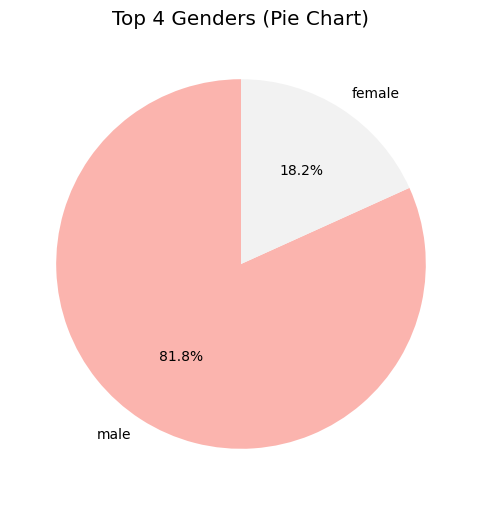

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_loan_data.csv")

df['Gender'].value_counts().head(4).plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Top 4 Genders (Pie Chart)',
    startangle=90,
    colormap='Pastel1'
)
plt.ylabel('')
plt.show()


By Education

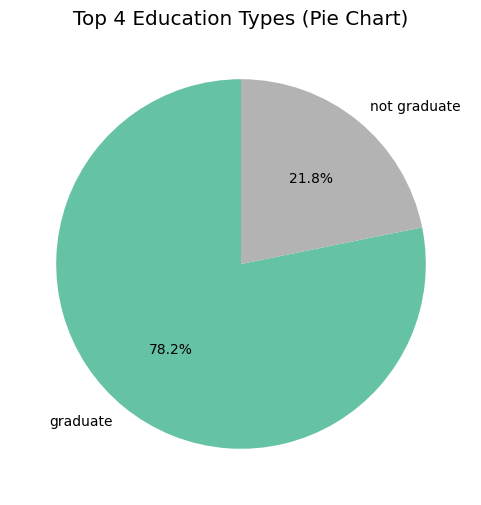

In [46]:
df['Education'].value_counts().head(4).plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Top 4 Education Types (Pie Chart)',
    startangle=90,
    colormap='Set2'
)
plt.ylabel('')
plt.show()
